# Data Set : 
Predicting house pricing 01_residential_data.xlsx (Dataset 1)

## Data Cleaning

In [1]:
import pandas as pd

In [2]:
# pip install openpyxl

In [3]:
# Load the data
data = pd.read_excel('01_residential_data.xlsx')

In [4]:
# Display the first few rows of the dataset
data.head()

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt
0,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,2016-01,3 ROOM,04 TO 06,68.0,New Generation,1981,342000.0,1.373922,103.855621,10065.227930,847.235690
1,333,ANG MO KIO AVENUE 1,ANG MO KIO,560333,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,327000.0,1.361343,103.851699,8662.831360,928.311457
2,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,3 ROOM,01 TO 03,67.0,New Generation,1980,280000.0,1.370816,103.859192,9749.916281,1094.432471
3,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,4 ROOM,07 TO 09,92.0,New Generation,1980,425000.0,1.370816,103.859192,9749.916281,1094.432471
4,331,ANG MO KIO AVENUE 1,ANG MO KIO,560331,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,338000.0,1.362111,103.850767,8747.934242,822.147955


In [5]:
# General information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176460 entries, 0 to 176459
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   block                176460 non-null  object 
 1   street_name          176460 non-null  object 
 2   town                 176460 non-null  object 
 3   postal_code          176460 non-null  int64  
 4   month                176460 non-null  object 
 5   flat_type            176460 non-null  object 
 6   storey_range         176460 non-null  object 
 7   floor_area_sqm       176460 non-null  float64
 8   flat_model           176460 non-null  object 
 9   lease_commence_date  176460 non-null  int64  
 10  resale_price         176460 non-null  float64
 11  latitude             176460 non-null  float64
 12  longitude            176460 non-null  float64
 13  cbd_dist             176460 non-null  float64
 14  min_dist_mrt         176460 non-null  float64
dtypes: float64(6), in

In [6]:
# Summary statistics for numerical columns
data.describe()

,postal_code,floor_area_sqm,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt
count,176460.000000,176460.000000,176460.000000,1.764600e+05,176460.000000,176460.000000,176460.000000,176460.000000
mean,560887.598725,97.449497,1995.223195,4.793598e+05,1.367588,103.841673,12427.507031,831.510563
std,190775.524205,24.049168,13.628932,1.651672e+05,0.042726,0.071216,4395.808395,464.516793
min,50004.000000,31.000000,1966.000000,1.400000e+05,1.270380,103.644248,592.121638,36.079525
25%,510187.000000,82.000000,1985.000000,3.600000e+05,1.336960,103.781229,9681.902128,475.328602
50%,560565.000000,94.000000,1996.000000,4.480000e+05,1.367409,103.846488,13343.661050,744.891776
75%,730149.000000,112.000000,2005.000000,5.680000e+05,1.395796,103.899484,15446.806430,1105.154334
max,825195.000000,259.000000,2019.000000,1.500000e+06,1.457071,103.987804,23298.462280,3496.402761


In [7]:
# Check for missing values
data.isnull().sum()

block                  0
street_name            0
town                   0
postal_code            0
month                  0
flat_type              0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
latitude               0
longitude              0
cbd_dist               0
min_dist_mrt           0
dtype: int64

No null values found, hence data is deemed as cleaned

In [8]:
# Calculate remaining years of lease
current_year = pd.to_datetime('today').year
data['lease_commence_date'] = pd.to_datetime(data['lease_commence_date'], errors='coerce')
data['remaining_years'] = data['lease_commence_date'].apply(lambda x: current_year - x.year if pd.notnull(x) else None)


In [9]:
data = data.drop(columns=['postal_code','latitude', 'longitude','lease_commence_date','month'])

 Latitude, longtitude, month and postal code are not required to train the model as there is no visible relationship between them and the model, as for lease commence date, I suppose the duration is needed hence I calculated the remaing years of lease instead and remove the column 'lease_commence_date'
 

In [10]:
data.to_csv('blocks.csv', index=False)

## EDA

In [10]:
#import libraries
import seaborn as sns
import matplotlib.pyplot as plt

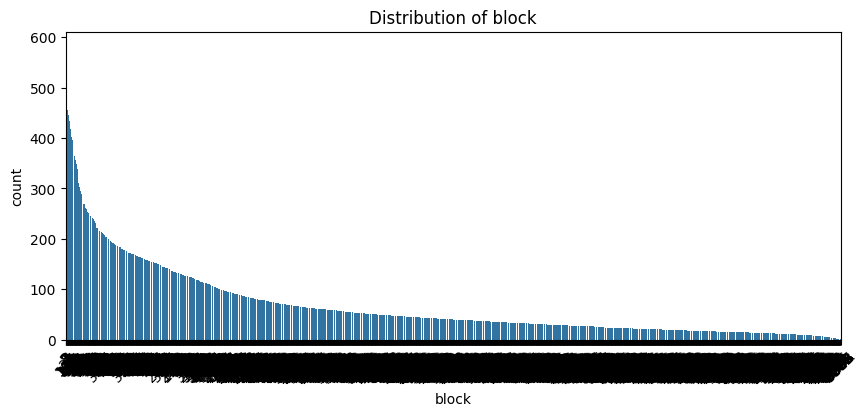

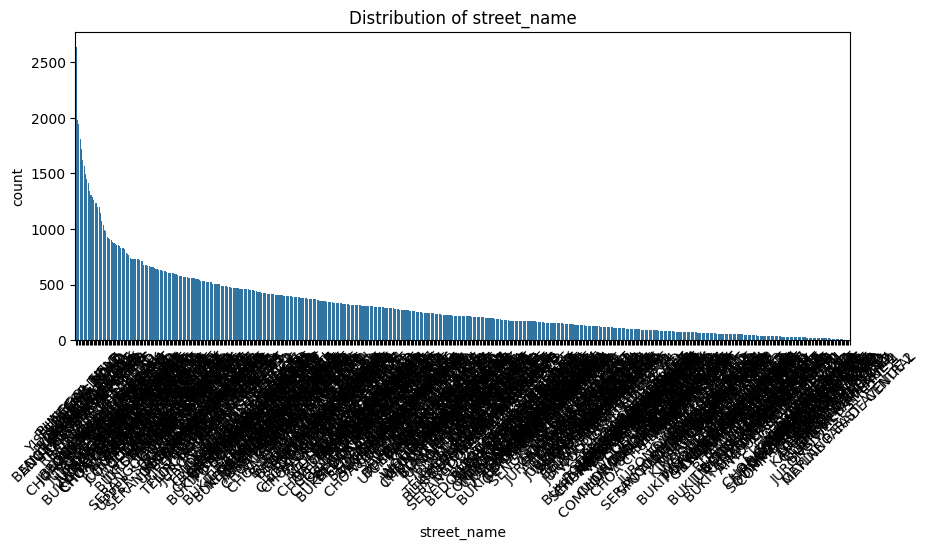

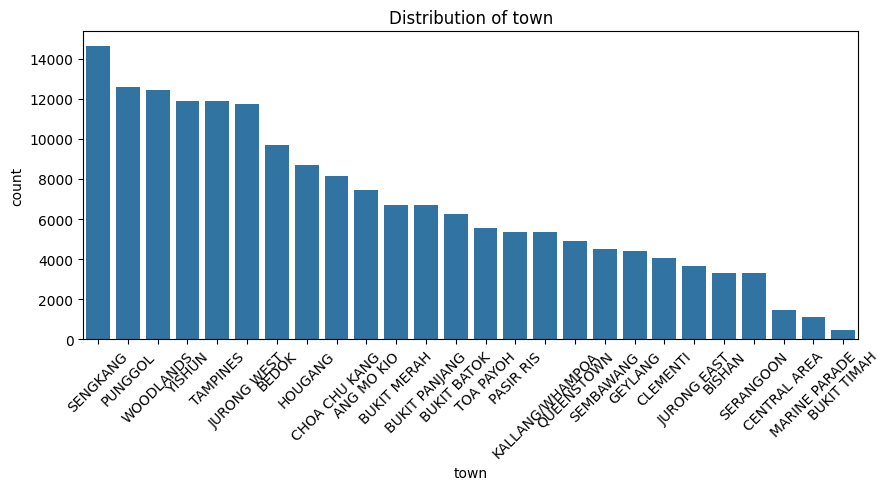

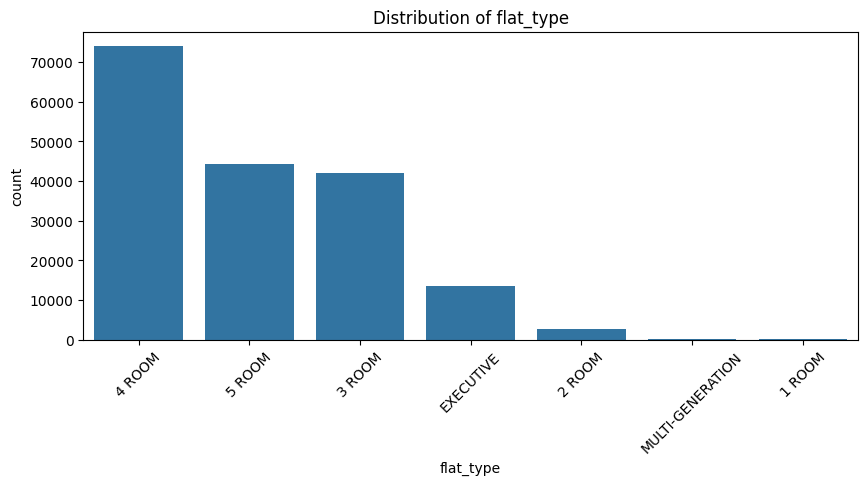

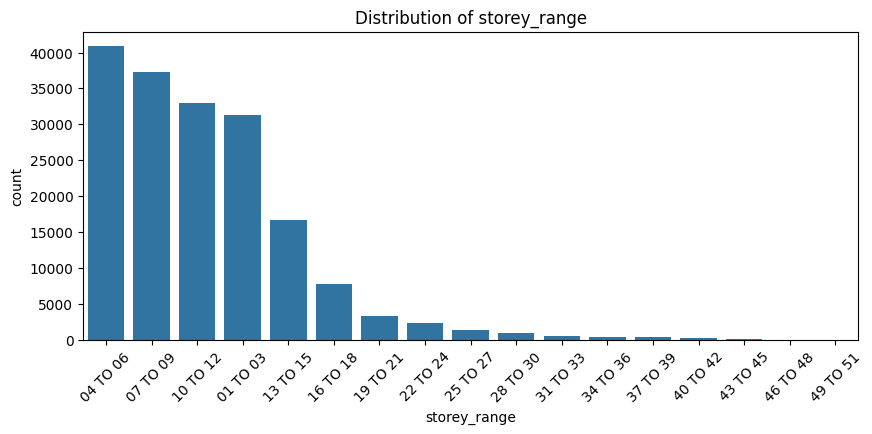

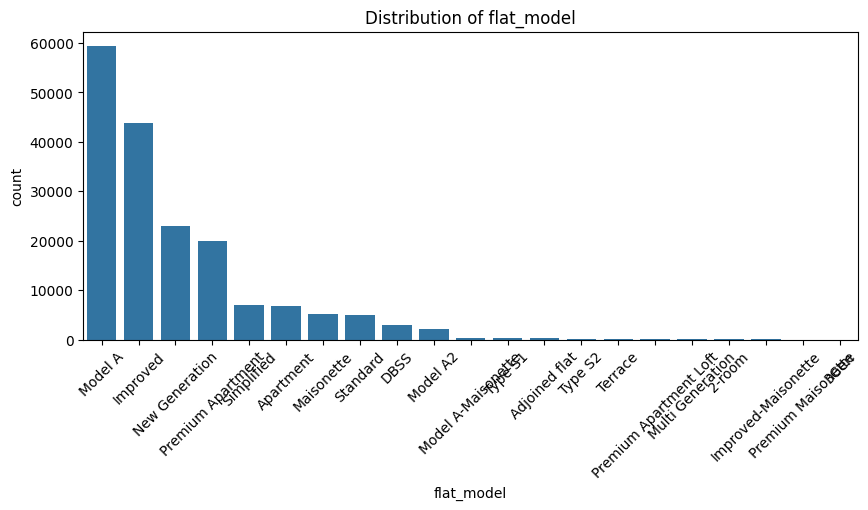

In [11]:
# Distribution of categorical variables
categorical_columns = ['block', 'street_name', 'town', 'flat_type', 'storey_range', 'flat_model']

for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=column, order=data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

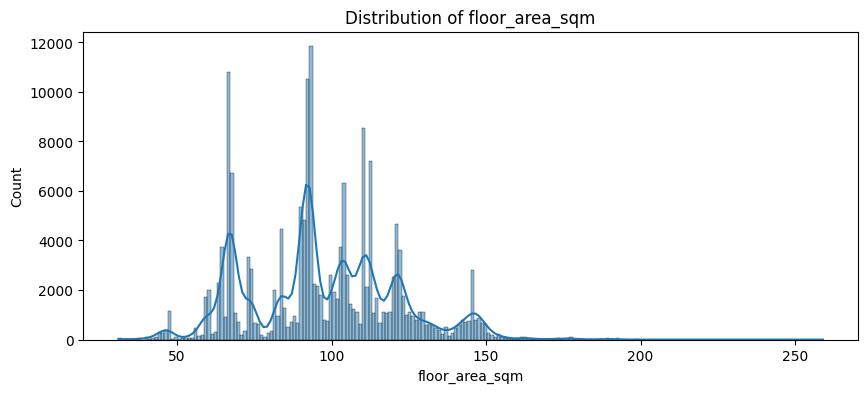

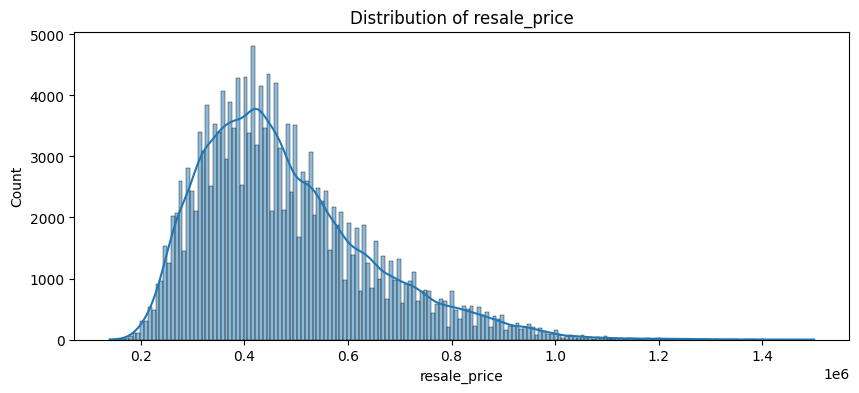

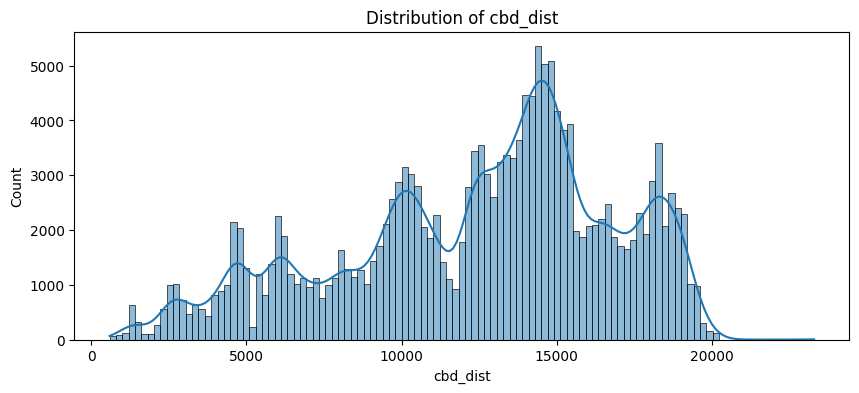

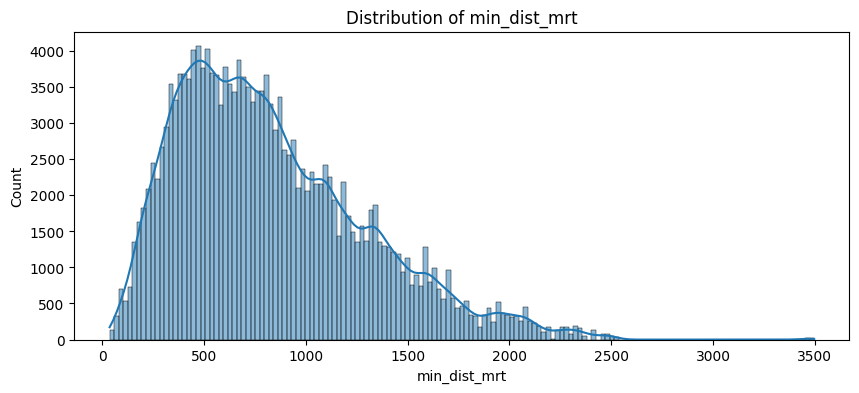

In [12]:
# Distribution of numerical variables
numerical_columns = ['floor_area_sqm', 'resale_price', 'cbd_dist', 'min_dist_mrt']

for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


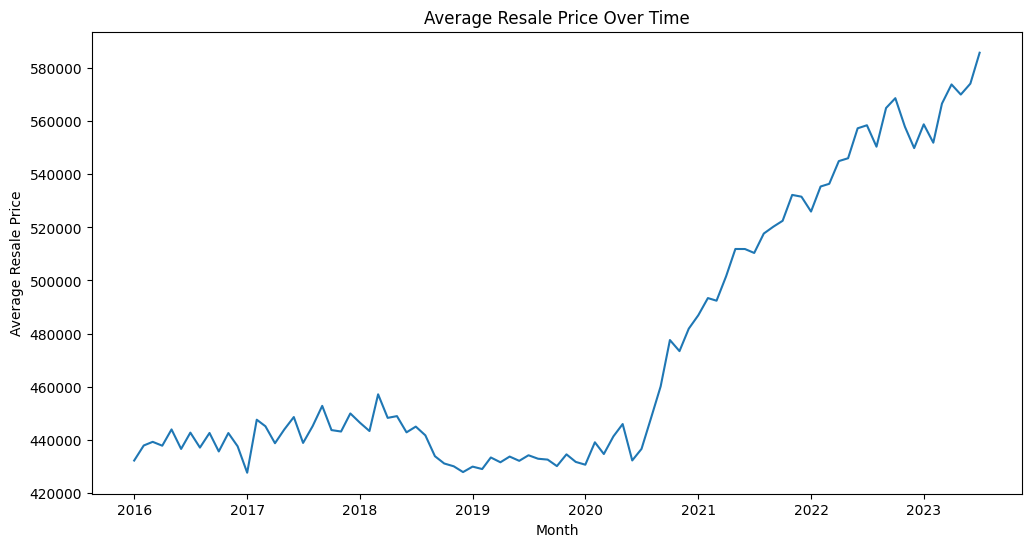

In [13]:
# Convert month to datetime format
data['month'] = pd.to_datetime(data['month'], format='%Y-%m')

# Resampling or aggregating by month
monthly_prices = data.groupby(data['month']).agg({'resale_price': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_prices, x='month', y='resale_price')
plt.title('Average Resale Price Over Time')
plt.xlabel('Month')
plt.ylabel('Average Resale Price')
plt.show()


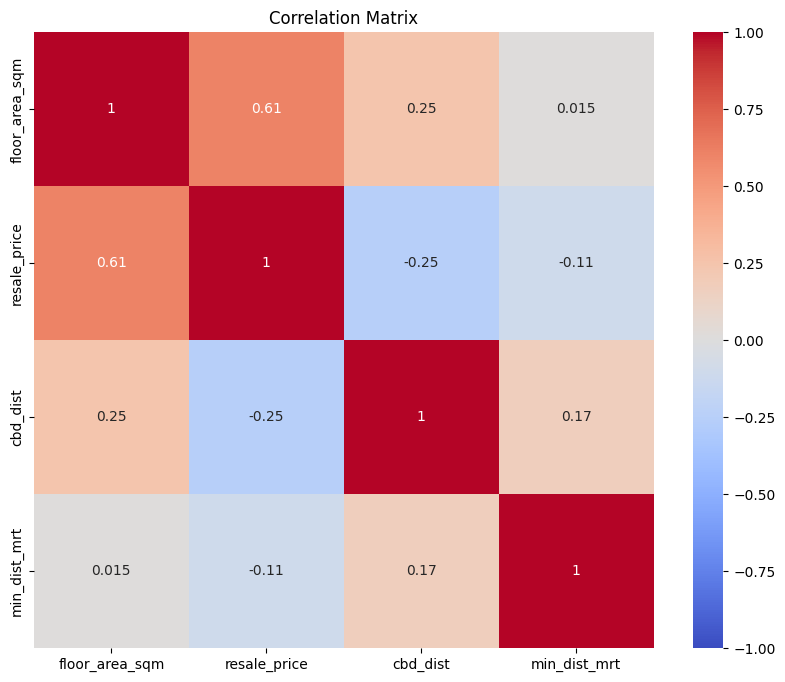

In [14]:
# Compute correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
